In [1]:
import json
import pandas as pd
import matplotlib.pyplot as plt 
import seaborn as sns
import re
import numpy as np
import regex as reg

%matplotlib inline  

Extracting references from texts:

In [2]:
!python ./Scripts/reference_extraction.py 

	Number of pdf documents :  1125
	Number of documents for which we have an extracted reference section:  1110
	Percentage of unparsed references: 0.001
	Number of unparsed references:  25
	Number of properly parsed references:  19088
	Saved reference list to: data/ as References.csv
	Saved to individual authors list: data/ as Reference_authors.csv


Loading references as previously extracted:

In [3]:
references = pd.read_csv('data/References.csv', index_col=0)

references.head()

,ref,file,ref_parsed,pub_year,year,identifier
0,"Benner, A. D., & Mistry, R. S. (2007). Congrue...",2018_14,"Benner, A. D., & Mistry, R. S. (2007)",2018,2007.0,"Benner, A. D., & Mistry, R. S. (2007). Congrue..."
1,"Cheryan, S., Siy, J. O., Vichayapai, M., Drury...",2018_14,"Cheryan, S., Siy, J. O., Vichayapai, M., Drury...",2018,2011.0,"Cheryan, S., Siy, J. O., Vichayapai, M., Drury..."
2,"Clance, P. R., & Imes, S. A. (1978). The impos...",2018_14,"Clance, P. R., & Imes, S. A. (1978)",2018,1978.0,"Clance, P. R., & Imes, S. A. (1978). The impos..."
3,"Cole, M. (1996). Cultural psychology: A once a...",2018_14,"Cole, M. (1996)",2018,1996.0,"Cole, M. (1996). Cultural psychology: A once a..."
4,"Cooper, H. M., Findley, M., and Good, T. (1982...",2018_14,"Cooper, H. M., Findley, M., and Good, T. (1982)",2018,1982.0,"Cooper, H. M., Findley, M., and Good, T. (1982..."


Some sample references, and their corresponding identifier:

In [4]:
sample = references[['ref', 'identifier']].sample(4)
_ = [print("Ref: ",r, '\nIdentifier: ', s,) for r, s in zip(sample.ref.tolist(), sample.identifier.tolist())]

Ref:  Baker, R., Gowda, S., & Corbett, A. (2011) Automatically Detecting a Student's Preparation for Future Learning: Help Use is Key. In Proc. of the 4th Int’l Conf. on Educational Data Mining (pp. 179-188). 
Identifier:  Baker, R., Gowda, S., & Corbett, A. (2011) Automatically Detecting a Student's Preparation for Future Learning: Help Use is Key
Ref:  Ito, M., Baumer, S., Bittanti, M., boyd, d., Cody, R., Herr-Stephenson, R., . . . Tripp, L. (2009). Hanging out, messing around, geeking out: Living and learning with new media. Cambridge: MIT Press. 
Identifier:  Ito, M., Baumer, S., Bittanti, M., boyd, d., Cody, R., Herr-Stephenson, R., . . . Tripp, L. (2009). Hanging out, messing around, geeking out: Living and learning with new media
Ref:  Glaser, B.G., & Strauss, A. (1967). The discovery of grounded theory: Strategies for qualitative research. Chicago: Aldine. 
Identifier:  Glaser, B.G., & Strauss, A. (1967). The discovery of grounded theory: Strategies for qualitative research
Re

### Who is cited the most:

First we check over all years:

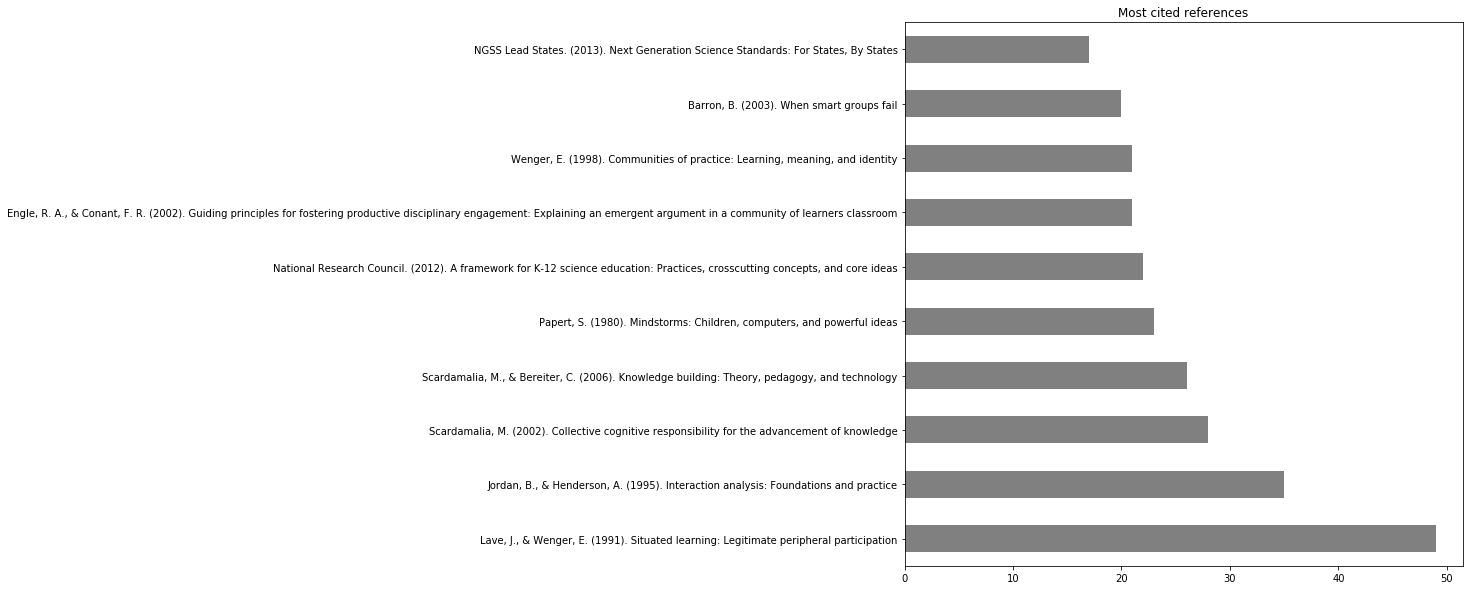

In [5]:
plt.figure(figsize=(10, 10))
plt.title('Most cited references')
references.identifier.value_counts().head(10).plot(kind='barh', color='grey')

## Variations in most cited over the years:

Then we look at the different years. A variation over the years could give insights in emerging topics, differences between ICLS and CSCL.

For instance, if we observe the number one most cited text, we see an alternating pattern - maybe those two are very important papers for the two respective conferences!

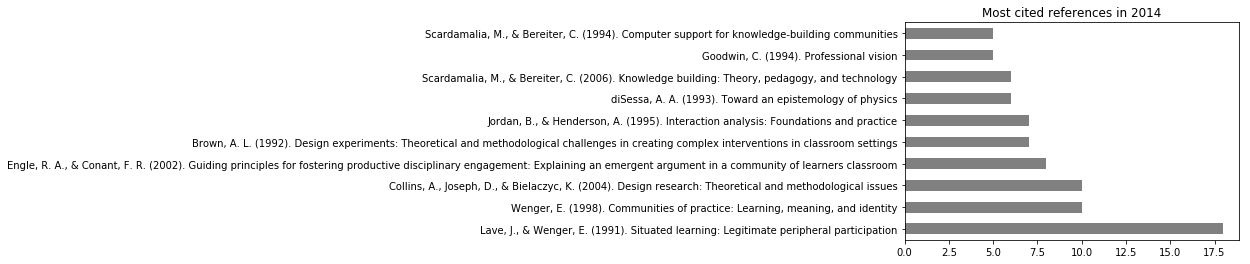

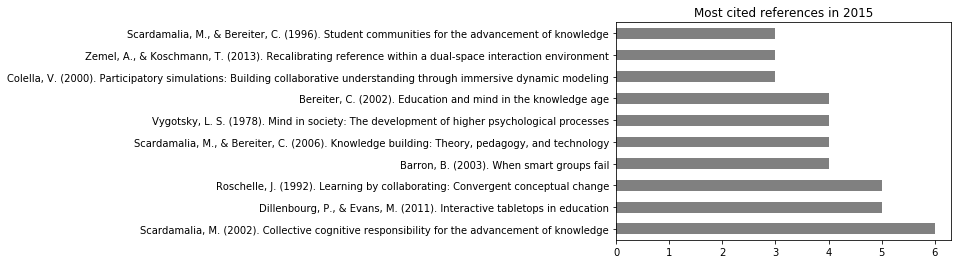

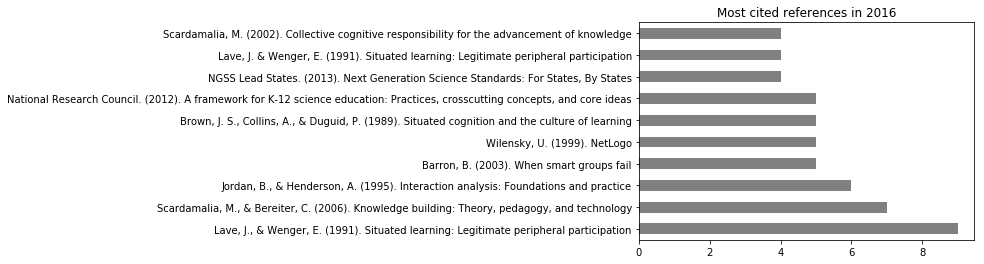

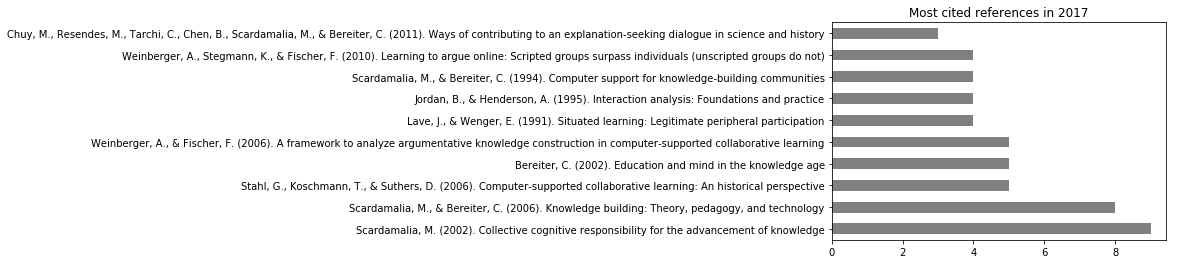

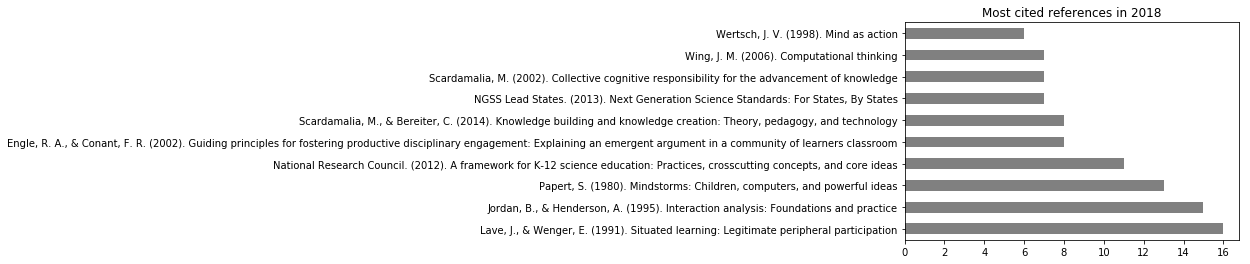

In [6]:
for year in sorted(references.pub_year.unique()):
    plt.title('Most cited references in {}'.format(year))
    references[references.pub_year == year].identifier.value_counts().head(10).plot(kind='barh', color='grey')
    plt.show()

### Looking at differences ICLS and CSCL

We decide to look at papers that are cited often and are only cited in ICLS or CSCL (and are cited at those two every year):

In [7]:
d = dict()
for year in sorted(references.pub_year.unique()):
    d[year] = set(references[references.pub_year == year].identifier.value_counts().index)

In [8]:
ICLS = d[2018].intersection(d[2016])
CSCL = d[2017].intersection(d[2015])

In [9]:
ICLS = d[2018]
CSCL = d[2015]

In [10]:
#Even years - odd years 
ICLS - CSCL

{'Manca, S., & Ranieri, M. (2016). Is Facebook still a suitable technology-enhanced learning environment',
 'Zimmerman, B. J. (2001). Theories of Self-Regulated Learning and Academic Achievement: An Overview and Analysis',
 'Kapur, M., Voiklis, J., & Kinzer, C. (2007). Sensitivities to early exchange in synchronous computer-supported collaborative learning (CSCL) groups',
 'DiSessa, A. A. (2001). Changing minds: Computers, learning, and literacy',
 'Stinson, D. W. (2017). Researching race without researching White supremacy in mathematics education research: A strategic discursive practice',
 'Xie, K., & Bradshaw, A. C. (2008). Using question prompts to support ill-structured problem solving in online peer collaborations',
 'Dunwoody, S. (2008). Science journalism',
 'Rosa H. (2013). Beschleunigung und Entfremdung - Entwurf einer kritischen Theorie spätmoderner Zeitlichkeit, Suhrkamp (Eng',
 'Slavin, R. E. (2008). Perspectives on evidence-based research in education–What works',
 'Lund

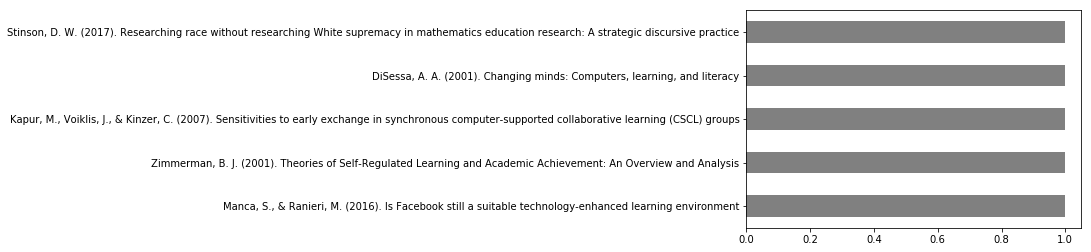

In [11]:
references.identifier.value_counts()[list(ICLS - CSCL)].head().sort_values().plot(kind='barh', color='grey')

In [12]:
CSCL - ICLS

{'Rosaen, C. L., Lundeberg, M., Cooper, M., Fritzen, A., & Terpstra, M. (2008). Noticing noticing',
 'Lent, R. W., Schmidt, J., & Schmidt, L. (2006). Collective efficacy beliefs in student work teams: Relation to self-efficacy, cohesion, and performance',
 'Peters, V. L., & Hewitt, J. (2010). An investigation of student practices in asynchronous computer conferencing courses',
 'Bamberger, J. (2013). Discovering the musical mind: A view of creativity as learning',
 'Bonderup Dohn, N. (2009). Affordances revisited: Articulating a Merleau-Pontian view',
 'Winthereik, B. & Langstrup, H. (2010). When patients care (too much) for information',
 'Marx, R. W., Blumenfeld, P. C., Krajcik, J. S., Fishman, B., Soloway, E., Geier, R., & Tal, R. T. (2004). Inquiry-\xad‐based science in the middle grades: Assessment of learning in urban systemic reform',
 'Bakhtin, M.M. (1984). Problems of Dostoevsky’s poetics (C',
 'Young, M. F., Slota, S., Cutter, A. B., Jalette, G., Mullin, G., Lai, B., . . . Yu

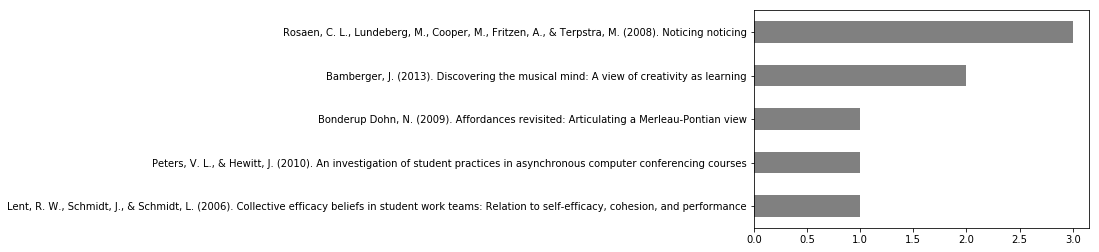

In [13]:
references.identifier.value_counts()[list(CSCL - ICLS)].head().sort_values().plot(kind='barh', color='grey')

## We look at how the publication year of  references are distributed:

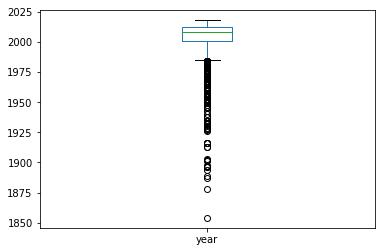

In [14]:
references.year.plot(kind='box')

We don't see much but CSCL has less early (pree 1920) outiers

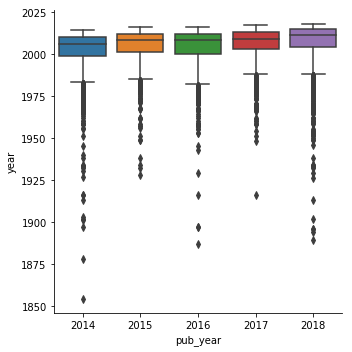

In [15]:
sns.catplot(data=references[['ref','pub_year', 'year']][~references.ref.duplicated()], x='pub_year', y='year', kind='box')

We have an interesting shift to newer sources in 2018:

In [16]:
references[['ref','pub_year', 'year']][~references.ref.duplicated()].groupby('pub_year').year.mean()

pub_year
2014    2003.272246
2015    2004.944150
2016    2004.825501
2017    2006.693820
2018    2007.472202
Name: year, dtype: float64

In [17]:
references[['ref','pub_year', 'year']][~references.ref.duplicated()].groupby('pub_year').year.median()

pub_year
2014    2006.0
2015    2008.0
2016    2008.0
2017    2009.0
2018    2011.0
Name: year, dtype: float64

## Number of authors in and out of conference being cited

In and out of conference citations, quick calculation:

In [18]:
reference_authors = pd.read_csv('data/Reference_authors.csv', index_col=0)

In [19]:
metadata = pd.read_csv('data/Parsed_metadata.csv')

In [20]:
referenced_authors = set(reference_authors.author.tolist())
authors_in_conf = set(metadata.shortend_names.map(lambda x: x.replace('.', '')))

In [21]:
print('Number of distinct authors of papers in dataset', len(authors_in_conf))
print('Number of distinct cited authors by some author in the conference ', len(referenced_authors))
print('Number of authors that where cited by an other author in the confernce :' , len(referenced_authors.intersection(authors_in_conf)))

Number of distinct authors of papers in dataset 2503
Number of distinct cited authors by some author in the conference  16920
Number of authors that where cited by an other author in the confernce : 1356


Example of how one can match the string:

In [22]:
match_conference = ' JLS |Journal of the Learning Sciences|CSCL|ICLS|ijCSCL|Computer(-| |)Supported Collaborative Learning'
re.search(match_conference,'bjfejf ICLS')

<_sre.SRE_Match object; span=(7, 11), match='ICLS'>

Find references belong to conference:

In [23]:
mask_c_s = reference_authors.ref.map(lambda x: True if re.search(match_conference, x) else False)
in_conference = set(reference_authors[mask_c_s].author)

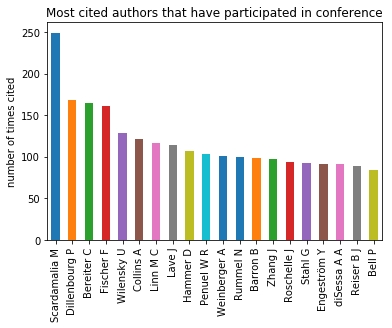

In [24]:
plt.title('Most cited authors that have participated in conference')
plt.ylabel('number of times cited')
# check that not in conference and is indeed author
is_human = reference_authors.dropna().author.map(lambda x: True if reg.search(r'\p{Lu}$',x) else False)
reference_authors[(reference_authors.author.isin(in_conference)) & is_human].author.value_counts().head(20).plot(kind = 'bar')

We limit the range of years to get people that are still "active"

In [25]:
not_in_conference = list(set(reference_authors[reference_authors.year > 2010].author) - in_conference.union(authors_in_conf))

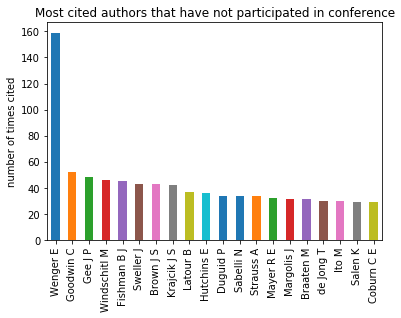

In [26]:
plt.title('Most cited authors that have not participated in conference')
plt.ylabel('number of times cited')
# check that not in conference and is indeed author
is_human = reference_authors.dropna().author.map(lambda x: True if reg.search(r'\p{Lu}$',x) else False)
reference_authors[(reference_authors.author.isin(not_in_conference)) & is_human].author.value_counts().head(20).plot(kind = 'bar')

We again split by years and conference in hopes of detecting a trend over the years or a difference between ICLS and CSCL:

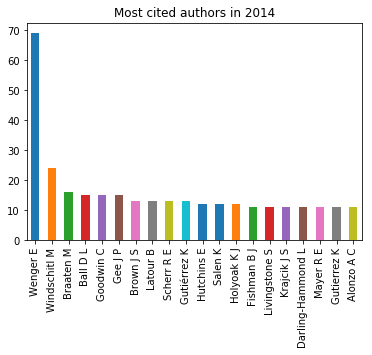

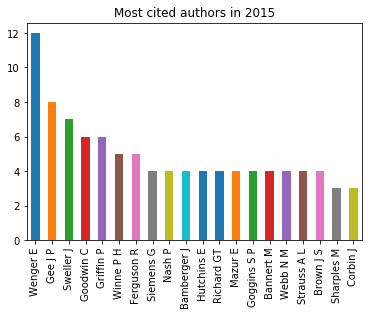

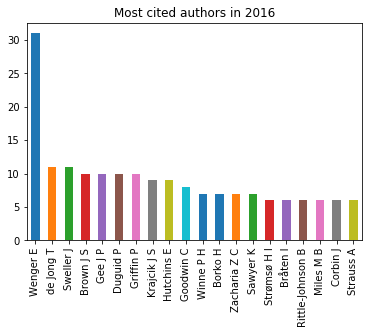

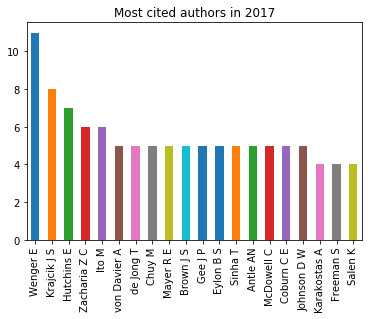

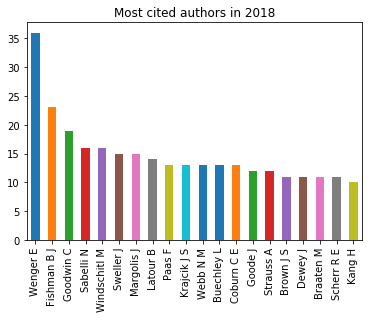

In [27]:
for year in sorted(reference_authors.pub_year.unique()):
    plt.title('Most cited authors in {}'.format(year))
    reference_authors[(reference_authors.author.isin(not_in_conference)) & is_human & (reference_authors.pub_year == year)
                 ].author.value_counts().head(20).plot(kind = 'bar')
    plt.show()

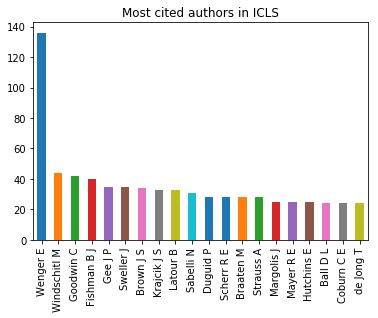

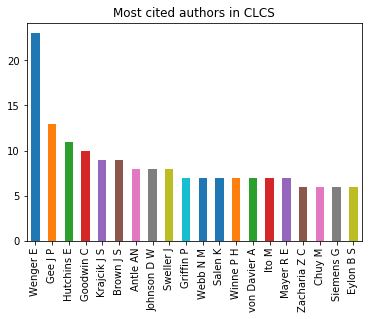

In [28]:
for i, conf in enumerate(['ICLS', 'CLCS']):
    plt.title('Most cited authors in {}'.format(conf))
    reference_authors[(reference_authors.author.isin(not_in_conference)) & is_human & (reference_authors.pub_year % 2 == i)
                 ].author.value_counts().head(20).plot(kind = 'bar')
    plt.show()

# extracting conference, journal from refrence string

Example of how we can split up the text, which is later used to extract the conference/journal if present:

In [29]:
text = references.sample().ref.item()
split_ref = r'(\.|\?) (?=[\p{Lu}][\p{L}])'
reg.split(split_ref, text)

['Kazemi , E., & Hubbard, A. (2008)',
 '.',
 'New directions for the design and study of professional development: Attending to the coevolution of teachers’ participation across contexts',
 '.',
 'Journal of Teacher Education, Attending to the coevolution of teachers’ participation across contexts',
 '.',
 'Journal of Teacher Education, 59(5), 428-441.']

We now define a regex that will catch up on words indicating a relation to a conference and then extract and clean the string to get a conference name:

_TODO: include symposium or not?_

In [30]:
#regex to find journals or conferences
pub = '(C|c)onference|(P|p)roceedings|(j|J)ournal|(T|t)ransactions|(s|S)ymposium'
re.search(pub, text)

<_sre.SRE_Match object; span=(177, 184), match='Journal'>

In [31]:
#set to lower for better matching
match_conference = 'International Conference of (the |)Learning Sciences| JLS |Journal of the Learning Sciences|CSCL|ICLS|ijCSCL|Computer(-| |)Supported Collaborative Learning'
match_conference.lower()

'international conference of (the |)learning sciences| jls |journal of the learning sciences|cscl|icls|ijcscl|computer(-| |)supported collaborative learning'

In [32]:
import nltk
from nltk import word_tokenize
def clean_string(x):
    
    x = x.lower() # lower to ignore case
    
    x = re.sub('[\'\"\”\/\d]*', '', x) #sub out elements that might cause same string to be diff
    x = re.sub(' & ', ' and ', x) # common spelling issue
    x = re.sub(' th | nd | rd | st | volume |—|  |-', ' ', x)
    x = re.sub(' on ', ' of ', x)
    x = x.strip()
    x = ' '.join([ z for z,y in nltk.pos_tag(word_tokenize(x)) if not y in ['CD', ':','$' ]])
    return x

In [33]:
re.search(match_conference.lower(), clean_string('international journal of computer-supported collaborative learning'))

<_sre.SRE_Match object; span=(25, 66), match='computer supported collaborative learning'>

In [34]:
clean_string('international journal of computer-supported collaborative learning')

'international journal of computer supported collaborative learning'

In [35]:
mask = references.ref.map(lambda x: True if 
                          (re.search(pub, x) and not
                          re.search(match_conference.lower(), clean_string(x))) else False)

In [36]:
sources = references[mask].ref.map(lambda x: 
                            [y for y in reg.split(split_ref, x) 
                             if re.search(pub, y)
                            ][0])

In [37]:
sources.shape

(4093,)

In [38]:
sources.head().tolist()

['Journal of Educational Psychology, 99(1), 140-153.',
 'Journal of Educational Psychology, 74(4), 577-579.',
 'American journal of Sociology, 106(6), 1691-1730.',
 'Journal of Personality and Social Psychology, 29(1), 80.',
 'Journal of Experimental Social Psychology, 45(4), 953-956.']

In [39]:
sources = sources.map(lambda x: clean_string(x))

In [40]:
def strip_garbage(s):
    r = [y.strip() for y in reg.split(r'\.|\,|\?|\;|\(|\)', s) if re.search(pub.lower(), y)]
    if len(r) > 0:
        return r[0]
    else:
        print(s)
        return None

In [41]:
sources = sources.map(lambda x: strip_garbage(x))#.map(lambda x: x[0] if len(x) > 0 else )

In [42]:
sources.sample(10).tolist()

['journal of teacher education',
 'american journal of physics',
 'journal of chemical education',
 'american educational research journal',
 'canadian journal of science',
 'the elementary school journal',
 'international journal of science education',
 'in the first international conference of computer support for collaborative learning',
 'journal of organizational and end user computing',
 'scandinavian journal of educational research']

Note: People like to misspell CSCL spell it in various forms..

## Most cited non  CSCL and ISCL conferences:

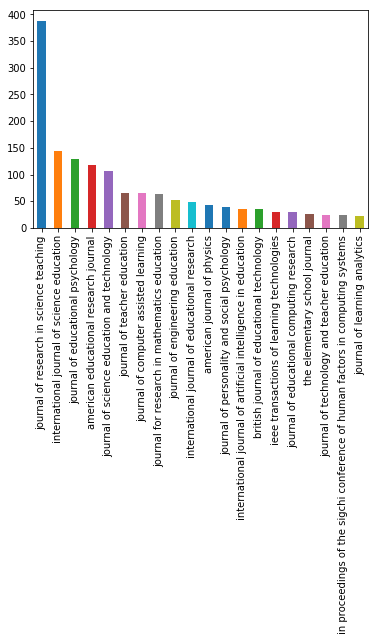

In [43]:
sources.value_counts().head(20).plot(kind='bar')

In [44]:
sources.value_counts().tail(10)

research trends in self regulated learning research in online learning environments a review of studies published in selected journals from to    1
in proceedings of the ieee international conference of wireless                                                                                   1
in proceedings of conference of computer supported cooperative work                                                                               1
relying of electronic journals reading patterns of astronomers                                                                                    1
paper presented at the science of team science conference “ building the knowledge base for effective team science                                1
journal of atmospheric science                                                                                                                    1
in proceedings of the fourth international conference of learning analytics and knowledge lak ’                 

We analyze how heavy the tail is to find whether we should work on parsing the tail or not:

In [45]:
conference_counts = sources.value_counts()

In [46]:
conference_counts[conference_counts >= 20].sum()

1576

In [47]:
conference_counts[conference_counts < 20].sum()

2517

Conclusion: As the tail accounts for a lage number of conferences better parsing might cause a shift in the most popular conferences. Hence we look into getting more uniform names

A first idea is to look at acronyms..: https://en.wikipedia.org/wiki/List_of_computer_science_conference_acronyms

In [48]:
import urllib3
from bs4 import BeautifulSoup

In [49]:
url = 'https://en.wikipedia.org/wiki/List_of_computer_science_conference_acronyms'
http_pool = urllib3.connection_from_url(url)
r = http_pool.urlopen('GET',url)
data = r.data
soup = BeautifulSoup(data, 'html.parser')
conferences_noisy = soup.find_all('div', class_='mw-parser-output')[0].find_all('li')
abrev_df = pd.DataFrame([c.text.split(' – ') for c in conferences_noisy if reg.search('–', c.text)], columns=['abreviation', 'full_name'])

/Users/zhenchensu/anaconda2/envs/ada/lib/python3.5/site-packages/urllib3/connectionpool.py:857: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


The gives us the following list:

In [50]:
abrev_df.head()

,abreviation,full_name
0,AAAI,AAAI Conference on Artificial Intelligence
1,AAMAS,International Conference on Autonomous Agents ...
2,ABZ,International Conference on Abstract State Mac...
3,ACL,Annual Meeting of the Association for Computat...
4,ALGO,ALGO Conference


Constricting regex for easier searching on both columns:

In [51]:
conf_regex = ' | '.join(abrev_df.abreviation.map(lambda x: x.lower()).tolist())
conf_regex

'aaai | aamas | abz | acl | algo | amcis | ants | ares | asiacrypt | asp-dac | ase | aswec | atmos | cade | cav | cc | ccsc | ches | chi | ciaa | cibb | cicling | cidr | cikm | crypto | cusec | cvpr | dac | date | dcfs | disc | dlt | dsn | ecai | ecco | ecis | ecml pkdd | ecoop | ecss | esa | esop | eswc | etaps | eurocrypt | eurographics | ewsn | fase | fast | fcrc | floc | focs | forte | fossacs | fse | ftp | gd | globecom | graphicon | hicss | hipc | hopl | hot interconnects | icalp | icassp | iccad | icc | iccit | iccv | icdcs | icfp | icis | icl | iclp | icml | icpads | icse | icsoc | icsr | icter | icws | ijcai | ijcar | ijcbs | indocrypt | ipdps | ipsn | isaac | isca | iscas | ismar | iswc | ispd | isscc | iswc | kdd | lics | lrec | mm | mobicom | mobihoc | mobilehci | naacl | nips | nime | oopsla | pacis | pimrc | pkc | pkdd | pldi | plop | podc | pods | popl | post | ppopp | psb | recomb | rev | rsa | rta | sac | sac | same | seams | sefm | sensys | sigcomm | sigcse | sigdoc |

In [52]:
sources.map(lambda x: True if reg.search(conf_regex, x) else False).sum()

42

In [53]:
references.ref.map(lambda x: reg.search(conf_regex, x.lower()).group(0) if reg.search(conf_regex, x.lower()) else None).dropna().value_counts()

 sigcse       33
 chi          30
 fast          8
aaai           7
 siggraph      6
 zum           5
 wine          4
 nips          4
 same          4
 kdd           2
 post          2
 www           2
 acl           2
 ijcai         1
 rsa           1
 cicling       1
 iswc          1
 naacl         1
 hicss         1
 vis           1
 sigir         1
 usenix        1
 sigdoc        1
Name: ref, dtype: int64

In [54]:
conf_regex = ' |'.join(abrev_df.full_name.map(lambda x: x.lower()).tolist())

In [55]:
references.ref.map(lambda x: reg.search(conf_regex, x.lower()).group(0) if reg.search(conf_regex, x.lower()) else None).dropna().value_counts()

acm technical symposium on computer science education         22
acm conference on human factors in computing systems           9
conference on information and knowledge management             3
international symposium on wearable computers                  2
hawaii international conference on system sciences             2
international joint conference on artificial intelligence      1
international symposium on wikis and open collaboration        1
world wide web conference                                      1
international conference on software engineering               1
international conference on distributed computing systems      1
acm international conference on design of communication        1
annual international acm sigir conference                      1
aaai conference on artificial intelligence                     1
Name: ref, dtype: int64

We see that this doesn't add tooo much information, but it also indicates that people don't really seem to cute much form computer science conferences

### Other conferences

And other idea is to look at non enlish words that come up often, they might be conference names!

In [56]:
import enchant
#check if a word is english
d = enchant.Dict("en_US")

In [57]:
#some issues but works well
d.check("online")

False

In [58]:
potential_abv = [word[0].upper()+word[1:] for sentence in sources.map(lambda x: word_tokenize(x)).tolist() for word in sentence if not d.check(word)]

In [59]:
pd.Series([p for p in potential_abv if not d.check(p) and len(p) > 2 and len(p) < 6]).value_counts().head(20)

Acm      153
Ieee      80
Idc       19
Pre       17
Lak       15
Icer       9
Cscw       8
Asee       8
Chais      5
Zdm        5
Earli      5
Pme        5
Aip        4
Edm        4
Aaai       4
Intl       4
Icmi       3
Hfsp       2
Aied       2
Fdg        2
dtype: int64

### Looking at the question of creating more uniform names:

We use a similarity measure:

This works somewhat okay, but probably not worth the effort given that this doesn't make sigchi and  ... computer human interaction the same conference

In [60]:
import difflib
difflib.SequenceMatcher(None, 'hello', 'helo').ratio()

0.8888888888888888

In [61]:
d = {}

In [62]:
for i, row in enumerate(sources.unique()):
    for j, row_2 in enumerate(sources.unique()):
        if i > j and row != row_2:
            difference = difflib.SequenceMatcher(None, row, row_2).ratio()
            if difference > 0.9:
                if not row_2 in d.keys():
                    d[row_2] = row

In [63]:
len(d)

321

As everything is fairly regular, maybe rake can give us some titles? -> pretty much the same as we get anyway -> irregular titles are really just infequent

In [64]:
import rake
import operator

In [65]:
rake_object = rake.Rake("data/SmartStoplist.txt", 26, 10, 10)
keywords = rake_object.run(' . '.join(sources.tolist()))
keywords

[('sigchi conference of human factors in computing systems',
  53.78323235008635),
 ('acm conference of computer supported cooperative work', 44.64212606035679),
 ('acm technical symposium of computer science education', 42.10101707007607),
 ('journal of pre college engineering education research', 39.63030876834367),
 ('journal of research of technology in education', 38.8280274163829),
 ('conference of interaction design and children', 35.128309400534135),
 ('conference of artificial intelligence in education', 34.94821349083069),
 ('conference of learning analytics and knowledge', 34.65169562717705),
 ('journal of adolescent and adult literacy', 34.32788127464215),
 ('journal for research in mathematics education', 34.01245699842366),
 ('journal of artificial intelligence in education', 33.999855270341946),
 ('journal of research in science teaching', 33.9080341911706),
 ('journal of technology and design education', 33.782219260405846),
 ('journal of science education and technolog

## Again looking at the difference between CSCL and ICLS - outside citations:

In [66]:
references['conference'] = sources

In [67]:
references['cited_in'] = references.file.map(lambda x: int(re.search('[\d]{4}',x).group(0)))

In [68]:
references.head()

,ref,file,ref_parsed,pub_year,year,identifier,conference,cited_in
0,"Benner, A. D., & Mistry, R. S. (2007). Congrue...",2018_14,"Benner, A. D., & Mistry, R. S. (2007)",2018,2007.0,"Benner, A. D., & Mistry, R. S. (2007). Congrue...",journal of educational psychology,2018
1,"Cheryan, S., Siy, J. O., Vichayapai, M., Drury...",2018_14,"Cheryan, S., Siy, J. O., Vichayapai, M., Drury...",2018,2011.0,"Cheryan, S., Siy, J. O., Vichayapai, M., Drury...",NaN,2018
2,"Clance, P. R., & Imes, S. A. (1978). The impos...",2018_14,"Clance, P. R., & Imes, S. A. (1978)",2018,1978.0,"Clance, P. R., & Imes, S. A. (1978). The impos...",NaN,2018
3,"Cole, M. (1996). Cultural psychology: A once a...",2018_14,"Cole, M. (1996)",2018,1996.0,"Cole, M. (1996). Cultural psychology: A once a...",NaN,2018
4,"Cooper, H. M., Findley, M., and Good, T. (1982...",2018_14,"Cooper, H. M., Findley, M., and Good, T. (1982)",2018,1982.0,"Cooper, H. M., Findley, M., and Good, T. (1982...",journal of educational psychology,2018


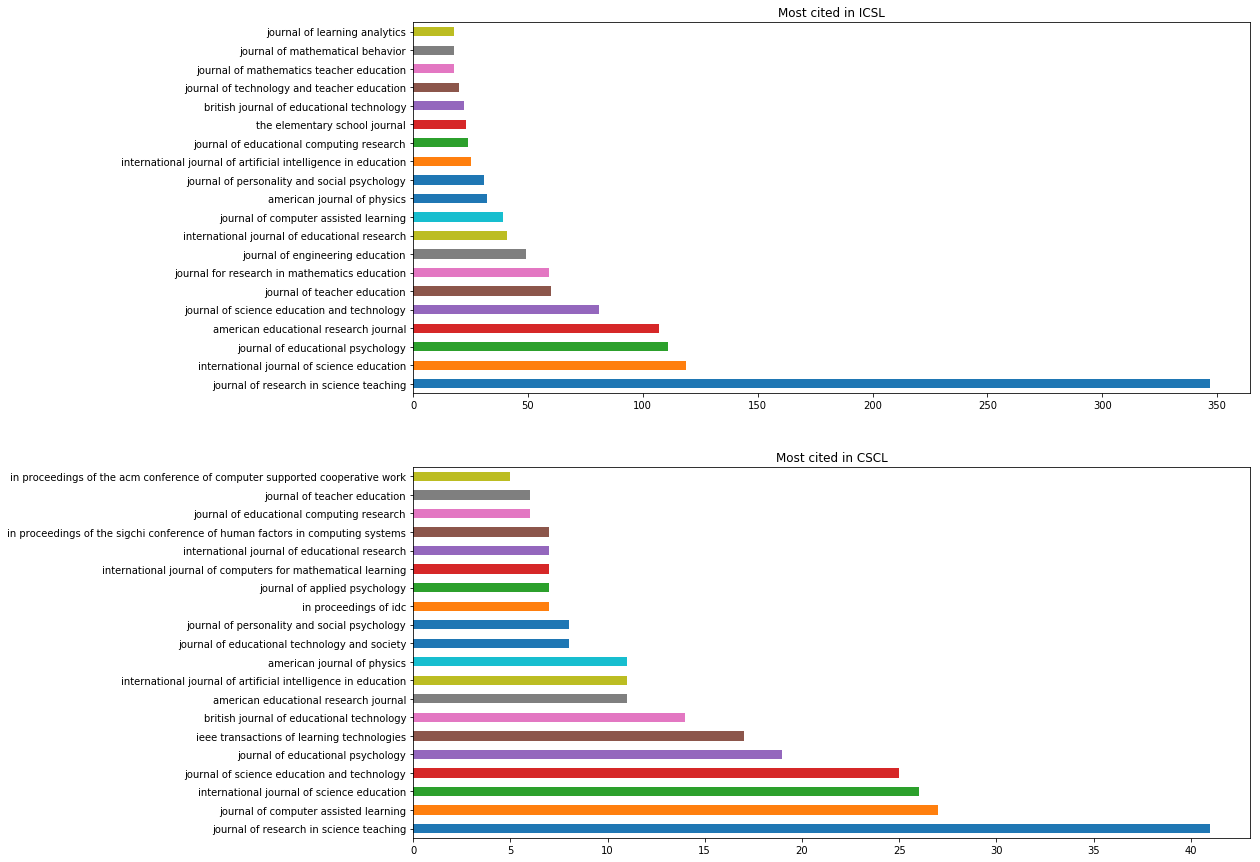

In [69]:
plt.figure(figsize=(15, 15))

plt.subplot(211)
plt.title('Most cited in ICSL')
references[references.cited_in % 2 == 0].conference.value_counts().head(20).plot(kind='barh')

plt.subplot(212)
plt.title('Most cited in CSCL')
references[references.cited_in % 2 == 1].conference.value_counts().head(20).plot(kind='barh')

Top 20 Conferences in both

In [70]:
set(references[references.cited_in % 2 == 0].conference.value_counts().head(20).index).intersection(set(references[references.cited_in % 2 == 1].conference.value_counts().head(20).index))

{'american educational research journal',
 'american journal of physics',
 'british journal of educational technology',
 'international journal of artificial intelligence in education',
 'international journal of educational research',
 'international journal of science education',
 'journal of computer assisted learning',
 'journal of educational computing research',
 'journal of educational psychology',
 'journal of personality and social psychology',
 'journal of research in science teaching',
 'journal of science education and technology',
 'journal of teacher education'}

Conferences in top twenty of ICLS and not CSCL

In [71]:
set(references[references.cited_in % 2 == 0].conference.value_counts().head(20).index) - set(references[references.cited_in % 2 == 1].conference.value_counts().head(20).index)

{'journal for research in mathematics education',
 'journal of engineering education',
 'journal of learning analytics',
 'journal of mathematical behavior',
 'journal of mathematics teacher education',
 'journal of technology and teacher education',
 'the elementary school journal'}

In [72]:
top_50 = set(references[references.cited_in % 2 == 0].conference.value_counts().head(50).index) - set(references[references.cited_in % 2 == 1].conference.value_counts().head(50).index)
top_50

{'british educational research journal',
 'british journal of educational psychology',
 'elementary school journal',
 'in proceedings of the sixth international conference of learning analytics and knowledge',
 'international journal of engineering education',
 'international journal of science and mathematics education',
 'international journal of technology and design education',
 'journal of adolescent and adult literacy',
 'journal of biological education',
 'journal of curriculum studies',
 'journal of educational change',
 'journal of experimental child psychology',
 'journal of interactive learning research',
 'journal of mathematical behavior',
 'journal of mathematics teacher education',
 'journal of pragmatics',
 'journal of pre college engineering education research',
 'journal of research of technology in education',
 'journal of science teacher education',
 'the journal of mathematical behavior'}

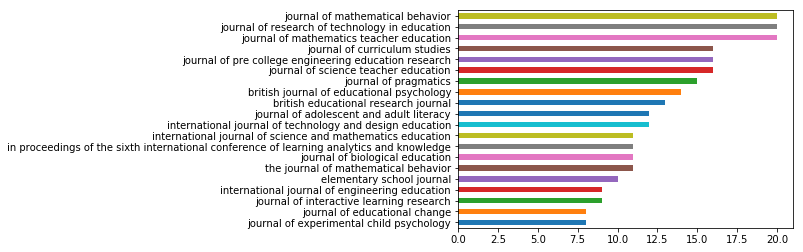

In [73]:
references[references.conference.isin(top_50)].conference.value_counts().sort_values(ascending=True).plot(kind='barh')

Conferences in top twenty of CSCL and not ICLS

In [74]:
set(references[references.cited_in % 2 == 1].conference.value_counts().head(20).index) - set(references[references.cited_in % 2 == 0].conference.value_counts().head(20).index)

{'ieee transactions of learning technologies',
 'in proceedings of idc',
 'in proceedings of the acm conference of computer supported cooperative work',
 'in proceedings of the sigchi conference of human factors in computing systems',
 'international journal of computers for mathematical learning',
 'journal of applied psychology',
 'journal of educational technology and society'}

In [75]:
top_50 = set(references[references.cited_in % 2 == 1].conference.value_counts().head(50).index) - set(references[references.cited_in % 2 == 0].conference.value_counts().head(50).index)
top_50

{'british journal of music education',
 'canadian journal of learning and technology',
 'ieee transactions of software engineering',
 'in international conference of intelligent tutoring systems',
 'in proceedings of idc',
 'in proceedings of the acm conference of computer supported cooperative work',
 'in proceedings of the acm technical symposium of computer science education',
 'in proceedings of the conference of human factors in computing systems',
 'in proceedings of the international conference of international conference for the learning sciences volume',
 'in proceedings of the third international conference of learning analytics and knowledge',
 'in world conference of educational multimedia',
 'international journal of artificial intelligence and education',
 'international journal of technology enhanced learning',
 'journal of applied psychology',
 'journal of asynchronous learning networks',
 'journal of computing sciences in colleges',
 'journal of education and work',
 '

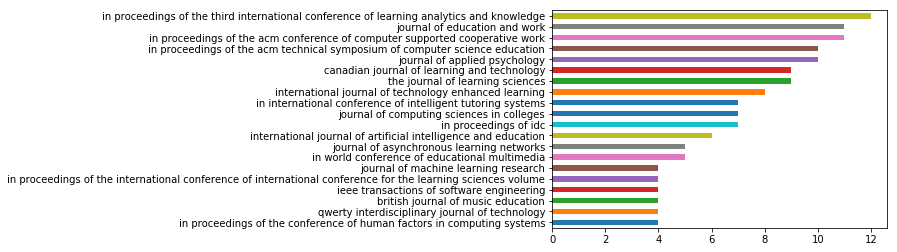

In [76]:
references[references.conference.isin(top_50)].conference.value_counts().sort_values(ascending=True).plot(kind='barh')